In [86]:
# imports
import pandas as pd

In [4]:
# read in billboard 2018-2020 data
path = '../data/billboardSongsWeekly.csv'
billboard_df = pd.read_csv(path)
billboard_df.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1963-0...,6/1/1963,11,Still,Bill Anderson,StillBill Anderson,1.0,17.0,11.0,8.0
1,http://www.billboard.com/charts/hot-100/1967-0...,1/7/1967,11,Coming Home Soldier,Bobby Vinton,Coming Home SoldierBobby Vinton,1.0,17.0,11.0,8.0
2,http://www.billboard.com/charts/hot-100/1971-0...,7/3/1971,11,She's Not Just Another Woman,The 8th Day,She's Not Just Another WomanThe 8th Day,1.0,17.0,11.0,8.0
3,http://www.billboard.com/charts/hot-100/1975-1...,11/29/1975,11,Saturday Night,Bay City Rollers,Saturday NightBay City Rollers,1.0,17.0,11.0,8.0
4,http://www.billboard.com/charts/hot-100/1979-0...,9/29/1979,11,Pop Muzik,M,Pop MuzikM,1.0,17.0,11.0,8.0


In [5]:
# checking for null values
billboard_df.isnull().sum()

url                           0
WeekID                        0
Week Position                 0
Song                          0
Performer                     0
SongID                        0
Instance                   5200
Previous Week Position    35984
Peak Position              5200
Weeks on Chart             5200
dtype: int64

In [6]:
# checking to see range of instance values
billboard_df['Instance'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., nan,  9.])

In [7]:
# replacing nans with 0
billboard_df = billboard_df.fillna(0)

In [8]:
# re-checking for null values
billboard_df.isnull().sum()

url                       0
WeekID                    0
Week Position             0
Song                      0
Performer                 0
SongID                    0
Instance                  0
Previous Week Position    0
Peak Position             0
Weeks on Chart            0
dtype: int64

In [9]:
# change weekid col to datetime
billboard_df["WeekID"] = pd.to_datetime(billboard_df["WeekID"])

In [10]:
# changing unnecessary floats to integers
billboard_df = billboard_df.astype({"Instance": int, "Previous Week Position": int, "Peak Position": int, "Weeks on Chart": int})

In [11]:
# checking data types
billboard_df.dtypes

url                               object
WeekID                    datetime64[ns]
Week Position                      int64
Song                              object
Performer                         object
SongID                            object
Instance                           int64
Previous Week Position             int64
Peak Position                      int64
Weeks on Chart                     int64
dtype: object

In [12]:
# removing data from before 2018
bb_subset = billboard_df[billboard_df['WeekID'].dt.date.astype(str) >= '2017-12-31']
bb_subset.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
17,https://www.billboard.com/charts/hot-100/2019-...,2019-12-07,11,Dance Monkey,Tones And I,Dance MonkeyTones And I,1,19,11,8
28,https://www.billboard.com/charts/hot-100/2018-...,2018-04-07,12,Pray For Me,The Weeknd & Kendrick Lamar,Pray For MeThe Weeknd & Kendrick Lamar,1,10,7,8
322,https://www.billboard.com/charts/hot-100/2019-...,2019-12-07,55,Into The Unknown,Idina Menzel & AURORA,Into The UnknownIdina Menzel & AURORA,1,0,55,1
373,https://www.billboard.com/charts/hot-100/2018-...,2018-02-03,56,Mine,Bazzi,MineBazzi,1,0,56,1
374,https://www.billboard.com/charts/hot-100/2018-...,2018-03-24,56,Indica Badu,Logic Featuring Wiz Khalifa,Indica BaduLogic Featuring Wiz Khalifa,1,0,56,1


In [13]:
# checking shape of df
bb_subset.shape

(15600, 10)

In [14]:
# reset index
bb_subset = bb_subset.reset_index(drop=True)
bb_subset.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,https://www.billboard.com/charts/hot-100/2019-...,2019-12-07,11,Dance Monkey,Tones And I,Dance MonkeyTones And I,1,19,11,8
1,https://www.billboard.com/charts/hot-100/2018-...,2018-04-07,12,Pray For Me,The Weeknd & Kendrick Lamar,Pray For MeThe Weeknd & Kendrick Lamar,1,10,7,8
2,https://www.billboard.com/charts/hot-100/2019-...,2019-12-07,55,Into The Unknown,Idina Menzel & AURORA,Into The UnknownIdina Menzel & AURORA,1,0,55,1
3,https://www.billboard.com/charts/hot-100/2018-...,2018-02-03,56,Mine,Bazzi,MineBazzi,1,0,56,1
4,https://www.billboard.com/charts/hot-100/2018-...,2018-03-24,56,Indica Badu,Logic Featuring Wiz Khalifa,Indica BaduLogic Featuring Wiz Khalifa,1,0,56,1


In [15]:
# renaming cols
bb_subset.columns = ['url', 'date', 'chart_position', 'song', 'performer', 'songID', 'instance', 'previous_position', 'peak', 'weeks_on_chart']
bb_subset.head()

,url,date,chart_position,song,performer,songID,instance,previous_position,peak,weeks_on_chart
0,https://www.billboard.com/charts/hot-100/2019-...,2019-12-07,11,Dance Monkey,Tones And I,Dance MonkeyTones And I,1,19,11,8
1,https://www.billboard.com/charts/hot-100/2018-...,2018-04-07,12,Pray For Me,The Weeknd & Kendrick Lamar,Pray For MeThe Weeknd & Kendrick Lamar,1,10,7,8
2,https://www.billboard.com/charts/hot-100/2019-...,2019-12-07,55,Into The Unknown,Idina Menzel & AURORA,Into The UnknownIdina Menzel & AURORA,1,0,55,1
3,https://www.billboard.com/charts/hot-100/2018-...,2018-02-03,56,Mine,Bazzi,MineBazzi,1,0,56,1
4,https://www.billboard.com/charts/hot-100/2018-...,2018-03-24,56,Indica Badu,Logic Featuring Wiz Khalifa,Indica BaduLogic Featuring Wiz Khalifa,1,0,56,1


In [16]:
# reordering cols
bb_subset = bb_subset[['song', 'performer', 'date', 'chart_position','previous_position', 'peak', 'weeks_on_chart', 'instance', 'songID', 'url']]
bb_subset.to_csv('billboard_subset.csv')
bb_subset.head()

,song,performer,date,chart_position,previous_position,peak,weeks_on_chart,instance,songID,url
0,Dance Monkey,Tones And I,2019-12-07,11,19,11,8,1,Dance MonkeyTones And I,https://www.billboard.com/charts/hot-100/2019-...
1,Pray For Me,The Weeknd & Kendrick Lamar,2018-04-07,12,10,7,8,1,Pray For MeThe Weeknd & Kendrick Lamar,https://www.billboard.com/charts/hot-100/2018-...
2,Into The Unknown,Idina Menzel & AURORA,2019-12-07,55,0,55,1,1,Into The UnknownIdina Menzel & AURORA,https://www.billboard.com/charts/hot-100/2019-...
3,Mine,Bazzi,2018-02-03,56,0,56,1,1,MineBazzi,https://www.billboard.com/charts/hot-100/2018-...
4,Indica Badu,Logic Featuring Wiz Khalifa,2018-03-24,56,0,56,1,1,Indica BaduLogic Featuring Wiz Khalifa,https://www.billboard.com/charts/hot-100/2018-...


In [ ]:
path2 = '../data/tracks20102021.csv'
tracks = pd.read_csv(path2)
tracks.head()

In [ ]:
import os
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:
load_dotenv('.env')
CLIENT_ID = os.getenv('SPOTIFY_CLIENT_ID')
CLIENT_SECRET = os.getenv('SPOTIFY_CLIENT_SECRET')

In [ ]:
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET))

In [ ]:
# From the tracks df
song_titles = tracks[['name', 'artists']]
song_titles.loc[:, 'artists'] = song_titles['artists'].apply(lambda x: x.strip("['']"))

In [ ]:
# from the bb_subset df
song_titles_bb = bb_subset[['song', 'performer']]
song_titles_bb.loc[:, 'performer'] = song_titles_bb.loc[:, 'performer'].apply(lambda x: x.split('Featuring')[0])
song_titles_bb.loc[:, 'performer'] = song_titles_bb.loc[:, 'performer'].apply(lambda x: x.split('&')[0])
song_titles_bb

In [ ]:
song_titles

In [ ]:
from pprint import pprint

In [ ]:
# TRACKS DF
song_list = {
    'artist': [],
    'song': [],
    'uri': []
}

for index, song in song_titles.iterrows():    
#     print(song['artists'])
    try:
        results = spotify.search(q=song)['tracks']['items'][0]
        artist = results['album']['artists'][0]['name']
        if artist == song['artists']:
            song_list['artist'].append(artist)
            song_list['song'].append(results['album']['name'])
            song_list['uri'].append(results['uri'])
        else:
            pass
    except IndexError:
        print(f"no results for {song['name']} by {song['artists']}", '\n')
        pass 


# DOESNT PICK UP MIXES/ must pass an exact title --> 
#    ex: Plastic Boy's Live Another Life has an Original Mix, 12" Vocal MIix, ect

In [ ]:
df = pd.DataFrame(song_list)
df

In [ ]:
# get audio_features for bb_subset in addition to uri
# for tracks df-- there are multiple artists 
'horse'.upper()

In [ ]:
s = song_titles_bb[0:20]
s

In [ ]:
r = []
for i, song in s.iterrows():
    results = spotify.search(q=song['song'])['tracks']['items']
    r.append(results)

In [ ]:
def get_song_uri(df, col_with_song_name):
    song_list = {
        'artist': [],
        'song': [],
        'uri': []
    }

    for i, row in df.iterrows():
        song = row[f'{col_with_song_name}']
    #     artist_from_df = row['performer'].lower()
        results = spotify.search(q=song, limit=5)['tracks']['items']
        for track in results:
            song_list['artist'].append(track['artists'][0]['name'])
            song_list['song'].append(track['name'])
            song_list['uri'].append(track['uri'])
            
    return song_list

In [ ]:
song_uri_df = pd.DataFrame(get_song_uri(song_titles_bb, 'song'))

In [ ]:
song_uri_df.to_csv('../ryan/data/bb_uri.csv')

In [ ]:
features = {
    'song': [],
    'artist': [],
    'features': []
}
for i, row in song_uri_df[11038:].iterrows():
    uri = row['uri']
    audio_features = spotify.audio_features(uri)[0]
    features['song'].append(row['song'])
    features['artist'].append(row['artist'])
    features['features'].append(audio_features)

In [ ]:
first_bit = features

In [ ]:
second_bit = features 

In [ ]:
third_bit = features 

In [ ]:
f = pd.DataFrame(first_bit)

In [ ]:
s = pd.DataFrame(second_bit)

In [ ]:
t = pd.DataFrame(third_bit)

In [ ]:
bb_features = pd.concat([pd.concat([f,s]), t])
bb_features = bb_features.rename(columns={'artist': 'performer'})
bb_features.to_csv('../ryan/data/bb_features.csv')
bb_features

In [ ]:
feats = bb_features['features'].apply(pd.Series)

In [ ]:
bb_features_df = pd.concat([bb_features, feats], axis=1).drop('features', axis=1)

In [ ]:
bb_features_df.to_csv('../ryan/data/bb_features.csv')

In [ ]:
# tracks_uri_1 = pd.DataFrame(get_song_uri(tracks[:5000], 'name'))

In [ ]:
bb_features_df.head()

In [ ]:
song_uri_df = song_uri_df.rename(columns={'artist': 'performer'})

In [ ]:
song_uri_df

In [ ]:
bb_subset['hitTF'] = 1

In [ ]:
hits = bb_subset[['song', 'performer', 'hitTF']].rename(columns={'song': 'song_x'})

In [ ]:
bb_final = bb_final.merge(hits, on=['song_x', 'performer'], how='left').drop_duplicates(['song_x', 'performer'], keep='first')
bb_Final = bb_final.fillna(0).iloc[:, 0:23]

In [ ]:
# change in position
human_features = bb_subset[['song', 'performer', 'chart_position', 'previous_position', 'weeks_on_chart', 'peak']]

In [ ]:
human_features = human_features.rename(columns={'song': 'song_x'})

In [ ]:
bb_Final = bb_Final.merge(human_features, on=['song_x', 'performer'], how='left').fillna(-1)

In [ ]:
BB_Final = bb_Final.drop_duplicates(['song_x', 'performer'], keep='first')

In [ ]:
BB_Final.to_csv('../ryan/data/BB_FINAL.CSV')

In [90]:
BB_Final = pd.read_csv('../jini/BB_FINAL.CSV')
BB_Final = BB_Final.drop('hitTF_x.1', axis=1)

In [91]:
bb_feature_num = BB_Final.select_dtypes(['int', 'float'])

In [92]:
bb_feature_num
# how long has song been on chart
#     consecutive week count? 
#
# add more features --> something a human use and infer from

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,weeks_on_chart_x,peak_x,chart_position_y,previous_position_y,weeks_on_chart_y,peak_y,chart_position,previous_position,weeks_on_chart,peak
0,0.824,0.588,6.0,-6.400,0.0,0.0924,0.69200,0.000104,0.1490,0.513,...,8.0,11.0,11.0,19.0,8.0,11.0,11.0,19.0,8.0,11.0
46656,0.794,0.679,6.0,-5.395,0.0,0.1040,0.16600,0.000002,0.1340,0.547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46657,0.664,0.212,6.0,-7.762,0.0,0.0460,0.93100,0.000000,0.1020,0.574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46658,0.535,0.948,6.0,-4.190,0.0,0.0356,0.00225,0.000000,0.3760,0.778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46659,0.732,0.678,2.0,-4.977,1.0,0.0886,0.08670,0.000024,0.1120,0.196,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684977,0.391,0.608,7.0,-10.714,1.0,0.2990,0.19000,0.000000,0.1880,0.420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3684978,0.228,0.125,8.0,-17.576,1.0,0.0369,0.90700,0.000425,0.1710,0.216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3684979,0.754,0.424,2.0,-8.463,1.0,0.0363,0.64300,0.000000,0.0652,0.806,...,21.0,33.0,33.0,0.0,21.0,33.0,33.0,0.0,21.0,33.0
3687723,0.666,0.841,2.0,-3.592,1.0,0.0312,0.61300,0.000000,0.1130,0.840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
(bb_feature_num.hitTF_x == 1.0).sum()

507

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [107]:
from sklearn.metrics import classification_report

In [95]:
def LogRegModel(X, y, size=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=size)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)
    
    X_scaler = MinMaxScaler().fit(X_train)

    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    X_val_scaled = X_scaler.transform(X_val)
    
    LogReg = LogisticRegression()
    
    t = time.time()
    LogReg.fit(X_train_scaled, y_train)
    elapsed_time = time.time() - t
    
    print(f"Training Data Score: {LogReg.score(X_train_scaled, y_train)}")
    print(f"Testing Data Score: {LogReg.score(X_test_scaled, y_test)}", '\n')
    
    predictions = LogReg.predict(X_val_scaled)
    
    print(classification_report(y_val, predictions, target_names=['not hit','hit']))

In [97]:
X = bb_feature_num.loc[:, bb_feature_num.columns != 'hitTF_x'].values
y = bb_feature_num['hitTF_x'].values

In [109]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


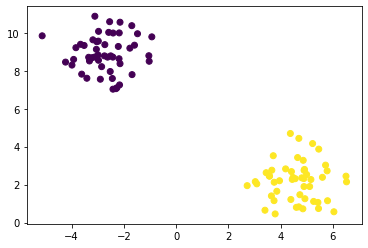

In [110]:
# Visualizing both classes
plt.scatter(X[:, 0], X[:, 1], c=y)

In [98]:
LogRegModel(X, y)

Training Data Score: 0.987986743993372
Testing Data Score: 0.9897579143389199 

              precision    recall  f1-score   support

     not hit       0.98      1.00      0.99       714
         hit       1.00      0.87      0.93        91

    accuracy                           0.99       805
   macro avg       0.99      0.93      0.96       805
weighted avg       0.99      0.99      0.98       805



In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [100]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_val_scaled = X_scaler.transform(X_val)

In [101]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()

In [102]:
import time

In [103]:
t = time.time()
LogReg.fit(X_train_scaled, y_train)
time.time() - t

0.049863338470458984

In [104]:
print(f"Training Data Score: {LogReg.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {LogReg.score(X_test_scaled, y_test)}")

Training Data Score: 0.9782270606531882
Testing Data Score: 0.9816593886462882


In [105]:
predictions = LogReg.predict(X_val_scaled)
for i, pred in enumerate(predictions):
    print("Classes are either 0 (not hit) or 1 (is hit)")
    print(f"The new point was classified as: {pred}")
    print(f'actual: {y_val[i]}', '\n')

Classes are either 0 (not hit) or 1 (is hit)
The new point was classified as: 0.0
actual: 0.0 

Classes are either 0 (not hit) or 1 (is hit)
The new point was classified as: 0.0
actual: 0.0 

Classes are either 0 (not hit) or 1 (is hit)
The new point was classified as: 0.0
actual: 0.0 

Classes are either 0 (not hit) or 1 (is hit)
The new point was classified as: 0.0
actual: 0.0 

Classes are either 0 (not hit) or 1 (is hit)
The new point was classified as: 0.0
actual: 0.0 

Classes are either 0 (not hit) or 1 (is hit)
The new point was classified as: 0.0
actual: 0.0 

Classes are either 0 (not hit) or 1 (is hit)
The new point was classified as: 0.0
actual: 0.0 

Classes are either 0 (not hit) or 1 (is hit)
The new point was classified as: 0.0
actual: 0.0 

Classes are either 0 (not hit) or 1 (is hit)
The new point was classified as: 0.0
actual: 0.0 

Classes are either 0 (not hit) or 1 (is hit)
The new point was classified as: 0.0
actual: 0.0 

Classes are either 0 (not hit) or 1 (is 

In [106]:
from sklearn.metrics import classification_report

print(classification_report(y_val, predictions, target_names=['not hit','hit']))

              precision    recall  f1-score   support

     not hit       0.98      1.00      0.99       193
         hit       1.00      0.86      0.93        22

    accuracy                           0.99       215
   macro avg       0.99      0.93      0.96       215
weighted avg       0.99      0.99      0.99       215



In [44]:
from sklearn.svm import SVC 
SVM = SVC(kernel='linear')
SVM.fit(X_train_scaled, y_train);

In [47]:
svm_predictions = SVM.predict(X_test_scaled)

In [48]:
print(classification_report(y_test, svm_predictions, target_names=['not hit','hit']))

              precision    recall  f1-score   support

     not hit       0.99      1.00      1.00       951
         hit       1.00      0.96      0.98       123

    accuracy                           1.00      1074
   macro avg       1.00      0.98      0.99      1074
weighted avg       1.00      1.00      1.00      1074



In [49]:
svm_predictions = SVM.predict(X_val_scaled)
print(classification_report(y_val, svm_predictions, target_names=['not hit','hit']))

              precision    recall  f1-score   support

     not hit       1.00      1.00      1.00       715
         hit       1.00      0.99      0.99        90

    accuracy                           1.00       805
   macro avg       1.00      0.99      1.00       805
weighted avg       1.00      1.00      1.00       805

